# Decision Tree 실습

# 1. 함수 익히기 및 모듈 불러오기

- 함수 익히기

In [84]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [85]:
clf.predict([[1, 1]])

array([1])

- 모듈 불러오기

In [86]:
from sklearn.datasets import load_iris
from sklearn import tree
from os import system

In [87]:
system("pip install graphviz")

0

In [88]:
import graphviz 

- 데이터 로드

In [89]:
iris = load_iris()

In [90]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [91]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [92]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [93]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 2. 의사결정나무 구축 및 시각화

- 트리 구축

In [94]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

- 트리의 시각화

In [95]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=iris.feature_names,
                               class_names=iris.target_names,
                               filled=True, rounded=True,
                               special_characters=True
                               )
graph = graphviz.Source(dot_data)

- 엔트로피를 활용한 트리

In [96]:
clf2 = tree.DecisionTreeClassifier(criterion="entropy")

In [97]:
clf2.fit(iris.data, iris.target)

DecisionTreeClassifier(criterion='entropy')

In [98]:
dot_data2 = tree.export_graphviz(clf2, out_file=None,
                               feature_names=iris.feature_names,
                               class_names=iris.target_names,
                               filled=True, rounded=True,
                               special_characters=True
                               )
graph2 = graphviz.Source(dot_data)

- 프루닝

In [99]:
clf3 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)

In [100]:
clf3.fit(iris.data, iris.target)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [101]:
dot_data3 = tree.export_graphviz(clf3, out_file=None,
                               feature_names=iris.feature_names,
                               class_names=iris.target_names,
                               filled=True, rounded=True,
                               special_characters=True
                               )
graph3 = graphviz.Source(dot_data)

- Confusion Matrix 구하기

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target,clf.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [103]:
confusion_matrix(iris.target,clf2.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [104]:
confusion_matrix(iris.target,clf3.predict(iris.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]])

# 3. Training - Test 구분 및 Confusion matrix 계산

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state=1)

In [107]:
clf4 = tree.DecisionTreeClassifier(criterion="entropy")

In [111]:
clf4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [112]:
confusion_matrix(y_test, clf4.predict(X_test))

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]])

# 4. Decision regression tree

y변수가 연속형일 때 사용

- 모듈 불러오기 및 데이터 생성

In [113]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

- Regression tree 구축

In [124]:
reg1 = tree.DecisionTreeRegressor(max_depth=2)
reg2 = tree.DecisionTreeRegressor(max_depth=4)

In [125]:
reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [126]:
reg2.fit(X,y)

DecisionTreeRegressor(max_depth=4)

In [127]:
X_test = np.arange(0.0, 5.0, 0.01)[:,np.newaxis]

In [128]:
y_1 = reg1.predict(X_test)
y_2 = reg2.predict(X_test)

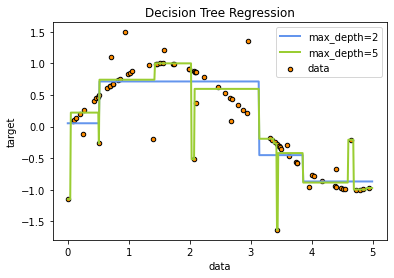

In [132]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [134]:
dot_data4 = tree.export_graphviz(reg2, out_file=None, 
                                filled=True, rounded=True,  
                                special_characters=True)

In [135]:
graph4 = graphviz.Source(dot_data4) 
graph4

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH